**Initialization of Libraries**

In [1]:
import sys
assert sys.version_info >= (3,5)

In [2]:
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from sklearn.preprocessing import OrdinalEncoder

In [7]:
from pandas.plotting import scatter_matrix

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [9]:
import time

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

**Importing all required Datasets**

In [11]:
binary_class_x_train=pd.read_csv('./Traffic_Sign/Binary_Classification/x_train_bin.csv')
binary_class_y_train=pd.read_csv('./Traffic_Sign/Binary_Classification/y_train_bin.csv')
binary_class_x_test=pd.read_csv('./Traffic_Sign/Binary_Classification/x_test_bin.csv')
binary_class_y_test=pd.read_csv('./Traffic_Sign/Binary_Classification/y_test_bin.csv')

complete_x_train=pd.read_csv('./Traffic_Sign/CompleteDataSet/x_train_all.csv')
complete_y_train=pd.read_csv('./Traffic_Sign/CompleteDataSet/y_train_all.csv')
complete_x_test=pd.read_csv('./Traffic_Sign/CompleteDataSet/x_test_all.csv')
complete_y_test=pd.read_csv('./Traffic_Sign/CompleteDataSet/y_test_all.csv')

onevsall_y_train_0=pd.read_csv('./Traffic_Sign/OnevrsAll/0_vrs_all/y_train_0.csv')
onevsall_y_train_1=pd.read_csv('./Traffic_Sign/OnevrsAll/1_vrs_all/y_train_1.csv')
onevsall_y_train_2=pd.read_csv('./Traffic_Sign/OnevrsAll/2_vrs_all/y_train_2.csv')
onevsall_y_train_3=pd.read_csv('./Traffic_Sign/OnevrsAll/3_vrs_all/y_train_3.csv')
onevsall_y_train_4=pd.read_csv('./Traffic_Sign/OnevrsAll/4_vrs_all/y_train_4.csv')
onevsall_y_train_5=pd.read_csv('./Traffic_Sign/OnevrsAll/5_vrs_all/y_train_5.csv')
onevsall_y_train_6=pd.read_csv('./Traffic_Sign/OnevrsAll/6_vrs_all/y_train_6.csv')
onevsall_y_train_7=pd.read_csv('./Traffic_Sign/OnevrsAll/7_vrs_all/y_train_7.csv')
onevsall_y_train_8=pd.read_csv('./Traffic_Sign/OnevrsAll/8_vrs_all/y_train_8.csv')
onevsall_y_train_9=pd.read_csv('./Traffic_Sign/OnevrsAll/9_vrs_all/y_train_9.csv')

**Visualization and Initial Data Exploration**

Basic description of Complete x and y datasets

In [12]:
complete_x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,87.0,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,96.0,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,98.0,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,112.0,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,100.0,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0


In [13]:
complete_y_train.head()

,0
0,0
1,0
2,0
3,0
4,0


In [14]:
complete_x_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
count,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,...,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.00000,9690.000000,9690.000000,9690.000000
mean,89.658514,89.545201,89.343756,89.566770,89.812590,89.853251,89.883282,89.978431,90.170175,90.519092,...,72.234881,71.833437,71.394118,70.572136,69.660165,68.878638,68.29453,67.831889,67.548297,67.393189
std,77.521341,77.430539,77.350452,77.498754,77.437292,77.279125,77.085714,77.081732,77.062371,77.155644,...,65.369022,65.439225,65.402298,65.144238,64.885963,64.530366,64.27455,63.799350,63.437102,63.506304
min,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.00000,5.000000,4.000000,4.000000
25%,32.000000,32.000000,32.000000,31.000000,32.000000,32.000000,32.000000,33.000000,33.000000,33.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,25.000000,25.00000,25.000000,25.000000,25.000000
50%,57.000000,58.000000,57.000000,58.000000,58.000000,58.000000,58.000000,58.000000,59.000000,59.000000,...,46.000000,46.000000,46.000000,45.000000,45.000000,44.000000,44.00000,43.000000,43.000000,43.000000
75%,126.000000,124.000000,122.750000,123.000000,125.000000,123.750000,124.000000,124.000000,124.000000,126.000000,...,95.000000,93.000000,91.000000,88.000000,86.000000,84.000000,82.00000,82.000000,81.000000,81.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000


In [15]:
complete_y_train.describe()

,0
count,9690.000000
mean,3.148607
std,2.177158
min,0.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,9.000000


In [16]:
complete_x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9690 entries, 0 to 9689
Columns: 2304 entries, 0 to 2303
dtypes: float64(2304)
memory usage: 170.3 MB


In [17]:
complete_y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9690 entries, 0 to 9689
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       9690 non-null   int64
dtypes: int64(1)
memory usage: 75.8 KB


Visualisation of a single image

In [18]:
complete_x_train.iloc[0].to_numpy().reshape(48,48)

array([[ 78.,  77.,  76., ...,  68.,  67.,  67.],
       [ 81.,  79.,  78., ...,  72.,  72.,  72.],
       [ 84.,  83.,  81., ...,  77.,  78.,  79.],
       ...,
       [ 98.,  99., 100., ..., 109., 104., 101.],
       [ 90.,  94., 100., ..., 103., 100.,  97.],
       [ 85.,  92., 102., ...,  98.,  95.,  94.]])

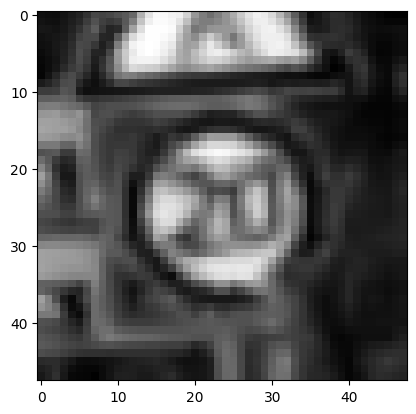

In [19]:
plt.imshow(complete_x_train.iloc[0].to_numpy().reshape(48,48),cmap="grey")

Visualisation of images from each class

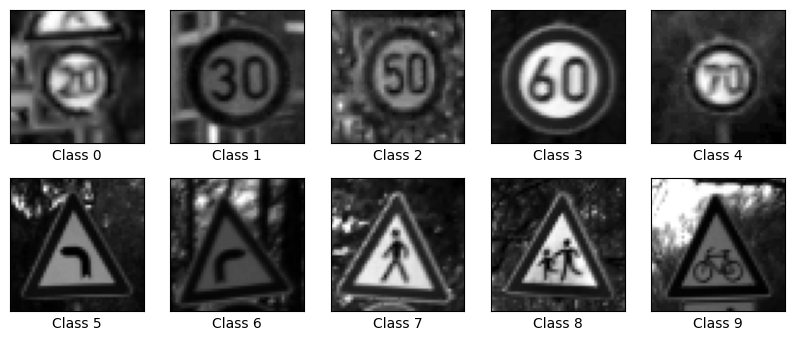

In [20]:
img_toshow = [0,210,2430,6085,7030,8275,8635,8875,9415,9685]

plt.figure(figsize=(10,4))

for i in range (0, len(img_toshow)):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(complete_x_train.iloc[img_toshow[i]].to_numpy().reshape(48,48), cmap='gray')
    plt.xlabel("Class "+str(complete_y_train.iloc[img_toshow[i]].to_numpy()[0]))

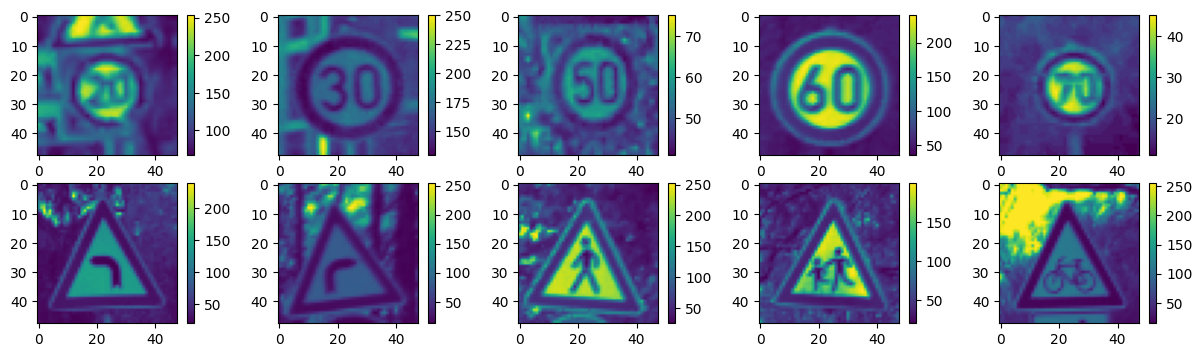

In [21]:
plt.figure(figsize=(15,4))
for i in range (0, len(img_toshow)):
    plt.subplot(2,5,i+1)
    plt.grid(False)
    plt.imshow(complete_x_train.iloc[img_toshow[i]].to_numpy().reshape(48,48))
    plt.colorbar()
    plt.grid(False)

**Naïve Bayes Classifier**

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB 
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB() 
clf.fit(complete_x_train, complete_y_train.values.ravel())
complete_y_pred = clf.predict(complete_x_test)

print("Accuracy:", accuracy_score(complete_y_test, complete_y_pred))
print("Precision: " , precision_score(complete_y_test, complete_y_pred, average='weighted'))
print('Recall score: ', recall_score(complete_y_test, complete_y_pred, average='weighted'))
print('F-measure: ', f1_score(complete_y_test, complete_y_pred, average='weighted'))
print(classification_report(complete_y_test, complete_y_pred))

Accuracy: 0.2809061488673139
Precision:  0.36012699988780417
Recall score:  0.2809061488673139
F-measure:  0.27908639423712606
              precision    recall  f1-score   support

           0       0.00      0.02      0.01        60
           1       0.43      0.49      0.46       720
           2       0.24      0.24      0.24       750
           3       0.21      0.40      0.27       450
           4       0.58      0.21      0.31       660
           5       0.30      0.05      0.09        60
           6       0.00      0.00      0.00        90
           7       0.00      0.00      0.00        60
           8       0.85      0.07      0.13       150
           9       0.02      0.02      0.02        90

    accuracy                           0.28      3090
   macro avg       0.26      0.15      0.15      3090
weighted avg       0.36      0.28      0.28      3090



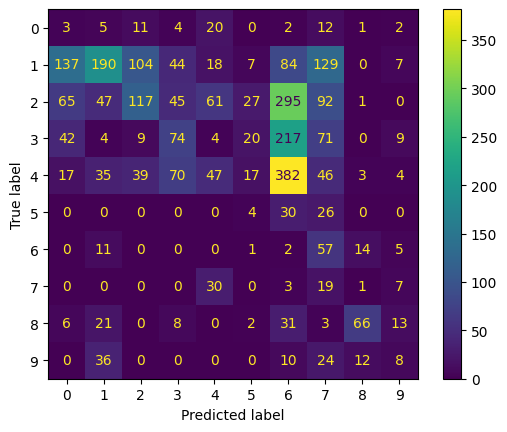

True Positive Rate:  0.581039755351682
False Positive Rate:  0.375


In [23]:
conf_matrix = confusion_matrix(complete_y_test, complete_y_pred)
class_names = list(set(complete_y_test) | set(complete_y_pred))
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot()
plt.show()

tpr = conf_matrix[1,1]/(conf_matrix[1,1]+conf_matrix[1,0]) #True Positive Rate
fpr = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1]) #False Positive Rate
print("True Positive Rate: ", tpr)
print("False Positive Rate: ", fpr)

**Methods to select the top correlating features**

In [24]:
def inverse_num(i):
    if i == 1: return 0
    else: return 1

In [25]:
class_arr_data = [
                [[inverse_num(i)] for i in onevsall_y_train_0.copy().to_numpy()],
                [[inverse_num(i)] for i in onevsall_y_train_1.copy().to_numpy()],
                [[inverse_num(i)] for i in onevsall_y_train_2.copy().to_numpy()],
                [[inverse_num(i)] for i in onevsall_y_train_3.copy().to_numpy()],
                [[inverse_num(i)] for i in onevsall_y_train_4.copy().to_numpy()],
                [[inverse_num(i)] for i in onevsall_y_train_5.copy().to_numpy()],
                [[inverse_num(i)] for i in onevsall_y_train_6.copy().to_numpy()],
                [[inverse_num(i)] for i in onevsall_y_train_7.copy().to_numpy()],
                [[inverse_num(i)] for i in onevsall_y_train_8.copy().to_numpy()],
                [[inverse_num(i)] for i in onevsall_y_train_9.copy().to_numpy()]
            ]

x_data = complete_x_train.copy()

In [26]:
def getTopFeatureMethod1(x):
    return_arr = []
    for i in class_arr_data:
        bestfeatures = SelectKBest(score_func=chi2, k=x//len(class_arr_data))
        fit = bestfeatures.fit(x_data,i)
        dfscores = pd.DataFrame(fit.scores_)
        dfcolumns = pd.DataFrame(x_data.columns)
        featureScores = pd.concat([dfcolumns,dfscores],axis=1)
        featureScores.columns = ['Specs','Score']
        return_arr = np.unique(np.concatenate((return_arr,featureScores.nlargest(x//len(class_arr_data),'Score')['Specs']),0))
    return return_arr

In [27]:
def getTopFeatureMethod2(x):
    features_array = [[]]*10
    return_arr = [[]]*3
    for i in range (0,len(class_arr_data)):
        bestfeatures = SelectKBest(score_func=chi2, k=x//len(class_arr_data))
        fit = bestfeatures.fit(x_data,class_arr_data[i])
        dfscores = pd.DataFrame(fit.scores_)
        dfcolumns = pd.DataFrame(x_data.columns)
        featureScores = pd.concat([dfcolumns,dfscores],axis=1)
        featureScores.columns = ['Specs','Score']
        features_array[i]=featureScores.nlargest(x//len(class_arr_data),'Score')['Specs']
    for i in range (0,10):
        return_arr[0] = np.unique(np.concatenate((return_arr[0], features_array[i][0:x//len(class_arr_data)]),0))
        return_arr[1] = np.unique(np.concatenate((return_arr[1], features_array[i][0:x//(len(class_arr_data)*2)]),0))
        return_arr[2] = np.unique(np.concatenate((return_arr[2], features_array[i][0:x//(len(class_arr_data)*4)]),0))
    return return_arr

**Running Naïve Bayes Classifier on the datasets produced by running the methods mentioned in above section**